# CSC 310 Final Project: Crop Yield Prediction App

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Group Members: Ryan Jensen, Timothy Hourihan


## Data Preprocessing

#### Importing necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.express as px
from google.colab import drive

#### Mounting to google drive and reading the dataset

In [4]:
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/yield_df.csv")
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [5]:
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


##EDA

#### Removing the unnamed column

In [6]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


####Changing column names to fit our project

In [7]:
df = df.rename(columns = {"Area":"country"})
df = df.rename(columns = {"Item":"crop"})
df = df.rename(columns = {"Year":"year"})
df.head(10)

,country,crop,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


###Checking for null boxes

In [8]:
df.isna().sum(axis=0)

country                          0
crop                             0
year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

###Top 10 countries with highest yield

In [9]:
df.groupby(['country'],sort=True)['hg/ha_yield'].sum().nlargest(10)

country
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

India and Brazil has far and beyond the highest yield, so it's important to note their average temperatures, rainfall, and pesticide use.

In [23]:
df_india = df[df['country'] == 'India']
df_india.head(10)
df_india.describe()

,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,4048.000000,4048.000000,4048.0,4048.000000,4048.000000
mean,2001.434783,80884.467391,1083.0,48459.040000,26.012589
std,7.064719,95950.224381,0.0,14997.351972,0.909861
min,1990.000000,6553.000000,1083.0,14485.330000,23.260000
25%,1995.000000,13704.750000,1083.0,37423.000000,25.460000
50%,2001.000000,28124.000000,1083.0,46195.000000,25.980000
75%,2008.000000,112471.000000,1083.0,61257.000000,26.670000
max,2013.000000,385818.000000,1083.0,75000.000000,28.850000


India has an average of 1083 mm rainfall, 48459 tonnes of pesticide, and a 26 degree celsius temperature to produce the highest yield by a large margin.




In [24]:
df_india = df[df['country'] == 'Brazil']
df_india.head(10)
df_india.describe()

,year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,2277.000000,2277.000000,2277.0,2277.000000,2277.000000
mean,2001.434783,73583.797101,1761.0,189736.869565,22.673913
std,7.065398,62134.430897,0.0,108835.427440,3.504673
min,1990.000000,11540.000000,1761.0,49695.000000,17.570000
25%,1995.000000,23100.000000,1761.0,92967.220000,19.150000
50%,2001.000000,38798.000000,1761.0,145552.000000,21.910000
75%,2008.000000,117588.000000,1761.0,312637.000000,25.950000
max,2013.000000,277517.000000,1761.0,367778.000000,28.760000


Brazil has an average of 1761 mm rainfall, 189736 tonnes of pesticide, and a 22.7 degree celsius temperature to produce the second highest yield.

###Histograms

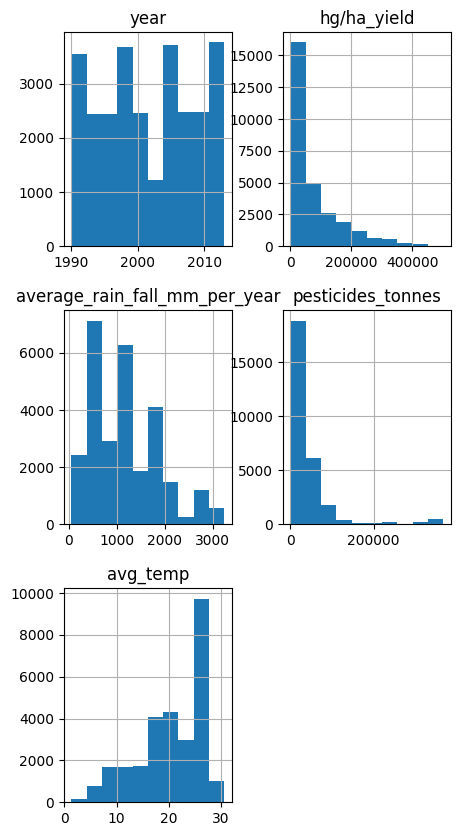

In [11]:
df.hist(figsize=(5,10));

The majority of pesticide usage according to the histograms is actually close to none. We know that India and Brazil use a lot of pesticide and have the two highest yields, so pesticide use is an important variable here.

The majority of rainfall seems to slow down after 2000mm, with most of the rainfall coming before 2000mm

Average temperature is around 25 degrees celsius

The overall yield is also close to none in most cases, which confirms the validity of the data set since conditions have to be perfect to have a good yield to harvest/sell.


###Scatter Matrix

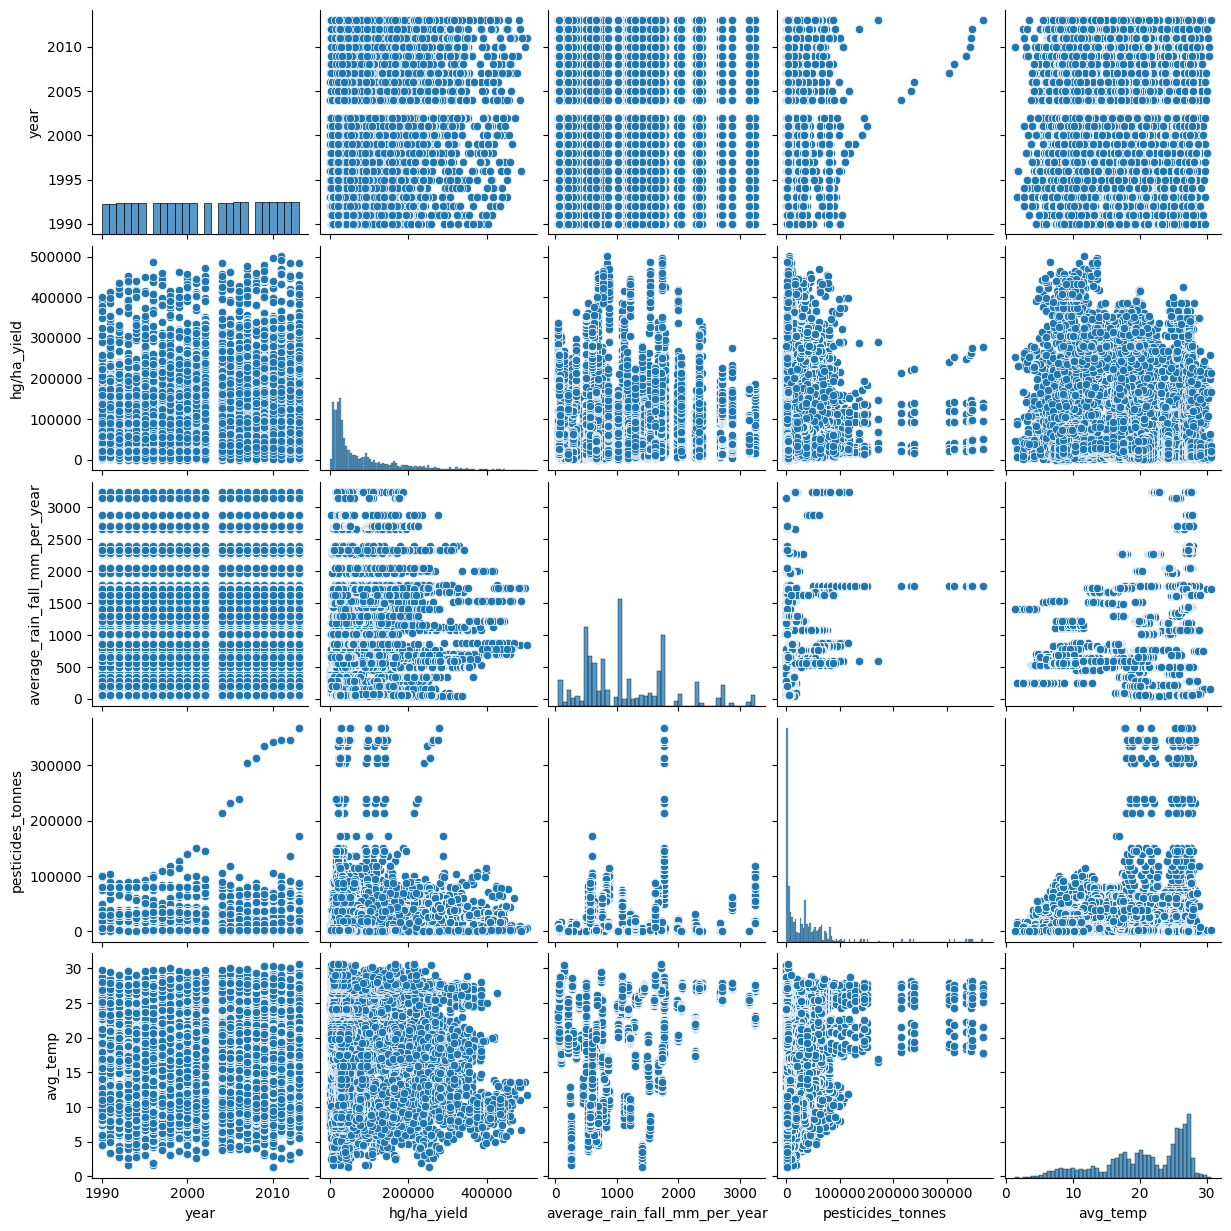

In [12]:
import seaborn as sns
sns.pairplot(df)

None of these scatter plots in the scatter matrix shows an incredibly strong correlation between any two column, so no deletion is required.

###Heat Map

Text(0.5, 1.0, 'Heatmap')

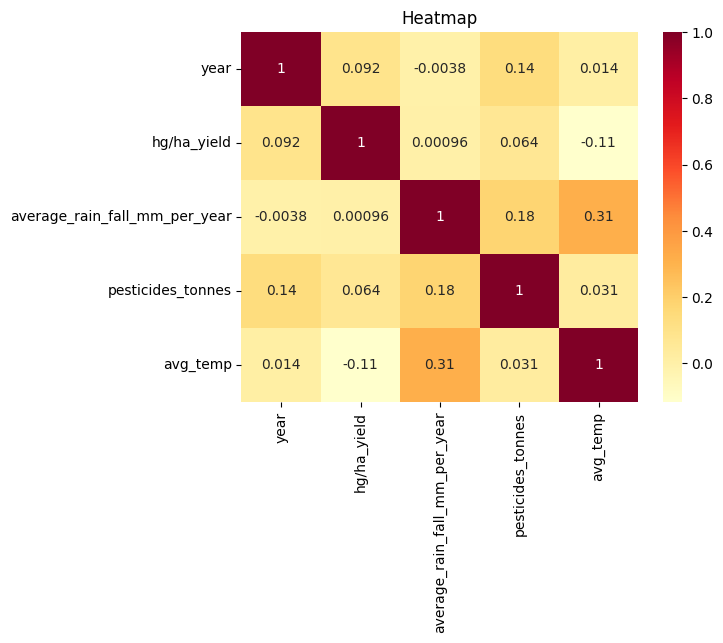

In [13]:
cor = df.select_dtypes(['int64','float64']).corr()
sns.heatmap(cor,cmap = 'YlOrRd',annot = True)
plt.title('Heatmap')

This heat map further shows that there isn't really a very strong correlation with any of the columns, so no deletion required.

While there isn't a strong correlation, we can see that average rain_fall and average_temp can affect eachother. This makes sense because countries with a lot of rain fall typically have slightly cooler climates and vice versa. However, they are not dependent on eachother so we have no need to alter any of the data.

## Building our Model

#### Importing necessary libraries

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

#### Preparing the data for moedeling

In [15]:
# Separating dataset into features and target
X = df.drop('hg/ha_yield', axis=1)
y = df['hg/ha_yield']

# Encoding categorical data
label_encoders = {}
for column in ['country', 'crop']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Training and evaluating models

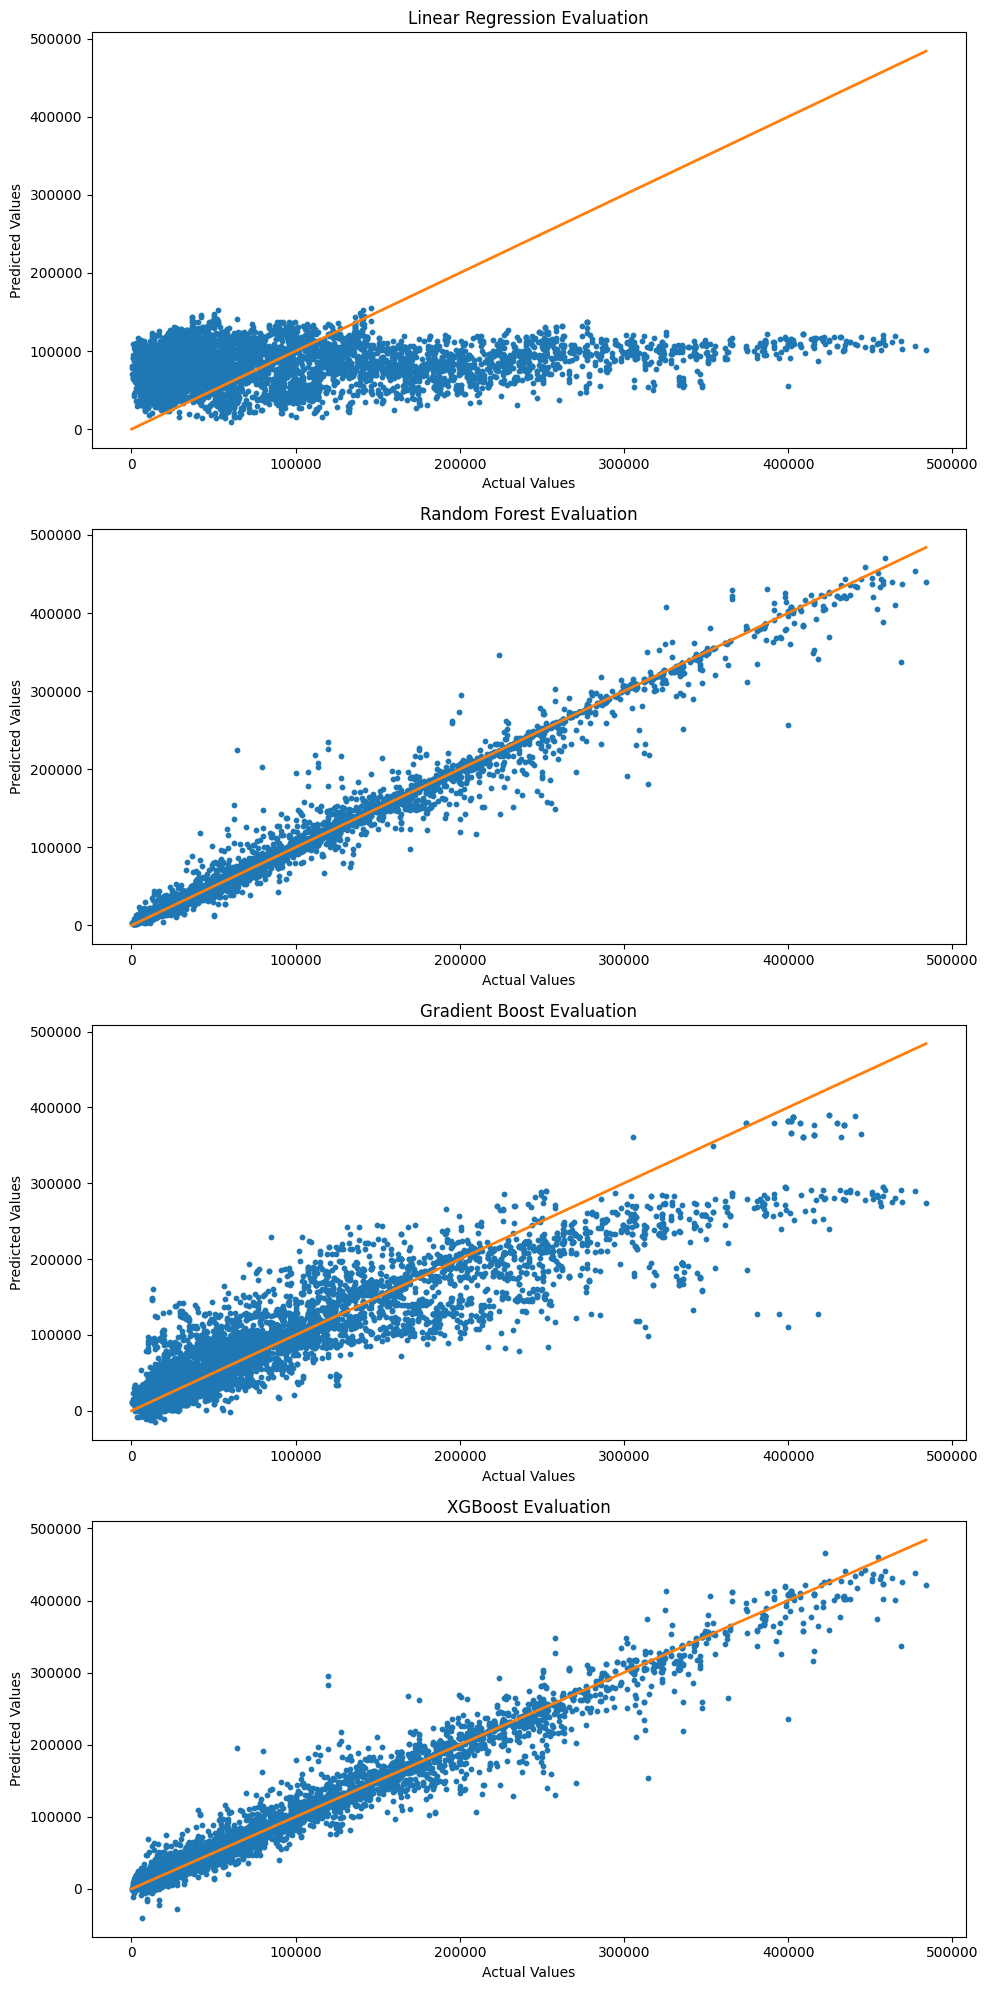

,Model,Accuracy,MSE,R2_score
0,Linear Regression,0.086285,6772588013.105465,0.086285
1,Random Forest,0.984750,113038880.346521,0.984750
2,Gradient Boost,0.832376,1242452823.324800,0.832376
3,XGBoost,0.972644,202765553.336630,0.972644


In [16]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
]

results = []
fig, axs = plt.subplots(len(models), figsize=(10, 20))

for idx, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, R2_score))

    # Plotting
    axs[idx].scatter(y_test, y_pred, s=10, color='#1f77b4')  # Blue color
    axs[idx].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#ff7f0e', linewidth=2)  # Orange color
    axs[idx].set_title(f'{name} Evaluation')
    axs[idx].set_xlabel('Actual Values')
    axs[idx].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Displaying results in a DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
df_styled = df_results.style.background_gradient(cmap='viridis', subset=['Accuracy', 'R2_score']).background_gradient(cmap='coolwarm_r', subset=['MSE'])
display(df_styled)


#### KFold Validation

In [17]:
results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    results.append((name, accuracy, MSE, MAE, MAPE, R2_score))

    # KFold Validation
    kf = KFold(n_splits=5, shuffle=True)
    scores = cross_val_score(model, X, y, cv=kf)
    mean_score = np.mean(scores)
    print(f"{name} - Mean CV Score: {mean_score}")

Linear Regression - Mean CV Score: 0.0818325966440587
Gradient Boost - Mean CV Score: 0.8300537521983546
XGBoost - Mean CV Score: 0.9750434489316019
KNN - Mean CV Score: 0.31382968711129744
Decision Tree - Mean CV Score: 0.9761377142131813


In [18]:
# Creating a DataFrame to display results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'MAE', 'MAPE', 'R2_score'])

# Display the DataFrame
display(df_results)

,Model,Accuracy,MSE,MAE,MAPE,R2_score
0,Linear Regression,0.086285,6.772588e+09,62779.325886,2.337926,0.086285
1,Gradient Boost,0.832376,1.242453e+09,21946.768516,0.560884,0.832376
2,XGBoost,0.972644,2.027656e+08,7946.193302,0.211445,0.972644
3,KNN,0.294480,5.229415e+09,49310.895291,1.538624,0.294480
4,Decision Tree,0.971242,2.131592e+08,4271.516346,0.086636,0.971242
